In [1]:
import os
import pandas as pd
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display


In [2]:
df = pd.read_csv("Dataset.csv") 
df.head()


,id,label
0,Robert Downey Jr_87.jpg,Robert Downey Jr
1,Lisa Kudrow_64.jpg,Lisa Kudrow
2,Ellen Degeneres_34.jpg,Ellen Degeneres
3,Billie Eilish_3.jpg,Billie Eilish
4,Hrithik Roshan_35.jpg,Hrithik Roshan


In [3]:
source_dir = "Faces/"
base_dir = "data_split/"
os.makedirs(base_dir, exist_ok=True)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Function to create folders and copy images
def prepare_data(split, split_df):
    for _, row in split_df.iterrows():
        label_folder = os.path.join(base_dir, split, row['label'])
        os.makedirs(label_folder, exist_ok=True)
        src = os.path.join(source_dir, row['id'])
        dst = os.path.join(label_folder, row['id'])
        if os.path.exists(src):
            shutil.copyfile(src, dst)

prepare_data('train', train_df)
prepare_data('val', val_df)


In [4]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_flow = train_gen.flow_from_directory(
    "Original Images/Original Images/",
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_flow = train_gen.flow_from_directory(
    "Original Images/Original Images/",
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 2060 images belonging to 31 classes.
Found 502 images belonging to 31 classes.


In [5]:
from tensorflow.keras import Input
from tensorflow.keras import layers, models

num_classes = train_flow.num_classes

model = models.Sequential([
    Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  
])


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_flow, validation_data=val_flow, epochs=10)


c:\Users\RENUKA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.0458 - loss: 3.5549 - val_accuracy: 0.0697 - val_loss: 3.3517
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.1067 - loss: 3.2200 - val_accuracy: 0.1375 - val_loss: 3.0450
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.2502 - loss: 2.6265 - val_accuracy: 0.1833 - val_loss: 2.8519
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4782 - loss: 1.7808 - val_accuracy: 0.2131 - val_loss: 3.0055
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7633 - loss: 0.8158 - val_accuracy: 0.2291 - val_loss: 3.8182
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9270 - loss: 0.2685 - val_accuracy: 0.2231 - val_loss: 5.2516
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9751 - loss: 0.0885 - val_accuracy: 0.2371 - val_loss: 6.1046
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.2191 - val_los

In [7]:
model.save("model/model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


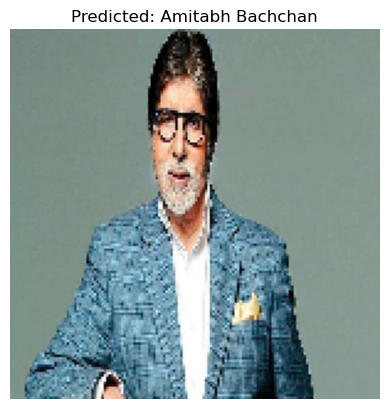

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the uploaded image
img_path = r"C:\Users\RENUKA\OneDrive\Desktop\DL LAB\Assignment_2\Original Images\Original Images\Amitabh Bachchan\Amitabh Bachchan_2.jpg" # Change this to match the actual uploaded image filename

# Preprocess the uploaded image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Same rescaling as during training

# Predict
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_label = train_flow.class_indices  # dictionary mapping class names to index
label_names = dict((v,k) for k,v in predicted_label.items())  # reverse dictionary
predicted_class_name = label_names[predicted_class_index]

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name}")
plt.show()
